## Does the following:
-  Simulate data, store in RECOVAR format
- Load data and ground truth from file


In [1]:
import recovar.config
from importlib import reload
import numpy as np
from cryodrgn import analysis
from cryodrgn import utils
from cryodrgn import ctf
from recovar import plot_utils
from recovar import output, dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from recovar import simulator
reload(simulator)
import jax
import warnings
# warnings.filterwarnings("error")

grid_size =256//1 *2
output_folder = f"/home/mg6942/mytigress/spike{grid_size}_ewald/"
volume_folder_input =  f"/home/mg6942/mytigress/spike{grid_size}/"
outlier_file_input = "/home/mg6942/mytigress/simulated_empiar10180/volumes/vol0915.mrc"
n_images = int(1e4)
voxel_size = 10 * 128 / grid_size#3/2/2
output.mkdir_safe(output_folder)
volume_distribution = np.zeros(1)
first_k = 1
volume_distribution[:first_k] = 1/first_k
image_stack, sim_info = simulator.generate_synthetic_dataset(output_folder, voxel_size, volume_folder_input, 
                                                             outlier_file_input, n_images, grid_size = grid_size,
                               volume_distribution = volume_distribution,  dataset_params_option = "dataset1", noise_level =1e-4, 
                               noise_model = "white", put_extra_particles = False, percent_outliers = 0.0, 
                               volume_radius = 0.6, trailing_zero_format_in_vol_name = True, noise_scale_std = 0.2 * 0, contrast_std =0.1 * 0 , disc_type = 'ewald_nearest')

(INFO) (xla_bridge.py) (30-Dec-23 15:29:06) Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: CUDA
(INFO) (xla_bridge.py) (30-Dec-23 15:29:06) Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
(INFO) (config.py) (30-Dec-23 15:29:06) Devices found: NVIDIA A100-PCIE-40GB
(INFO) (ctf.py) (30-Dec-23 15:29:17) Image size (pix)  : 512
(INFO) (ctf.py) (30-Dec-23 15:29:17) A/pix             : 0.8187500238418579
(INFO) (ctf.py) (30-Dec-23 15:29:17) DefocusU (A)      : 15301.099609375
(INFO) (ctf.py) (30-Dec-23 15:29:17) DefocusV (A)      : 14916.400390625
(INFO) (ctf.py) (30-Dec-23 15:29:17) Dfang (deg)       : 5.28000020980835
(INFO) (ctf.py) (30-Dec-23 15:29:17) voltage (kV)      : 300.0
(INFO) (ctf.py) (30-Dec-23 15:29:17) cs (mm)           : 2.700000047683716
(INFO) (ctf.py) (30-Dec-23 15:29:17) w                 : 0.070

(INFO) (ctf.py) (30-Dec-23 15:30:20) Image size (pix)  : 512
(INFO) (ctf.py) (30-Dec-23 15:30:20) A/pix             : 2.5
(INFO) (ctf.py) (30-Dec-23 15:30:20) DefocusU (A)      : 20175.69921875
(INFO) (ctf.py) (30-Dec-23 15:30:20) DefocusV (A)      : 20731.69921875
(INFO) (ctf.py) (30-Dec-23 15:30:20) Dfang (deg)       : 70.72000122070312
(INFO) (ctf.py) (30-Dec-23 15:30:20) voltage (kV)      : 300.0
(INFO) (ctf.py) (30-Dec-23 15:30:20) cs (mm)           : 2.700000047683716
(INFO) (ctf.py) (30-Dec-23 15:30:20) w                 : 0.0
(INFO) (ctf.py) (30-Dec-23 15:30:20) Phase shift (deg) : 4.013987064361572
n images 10000


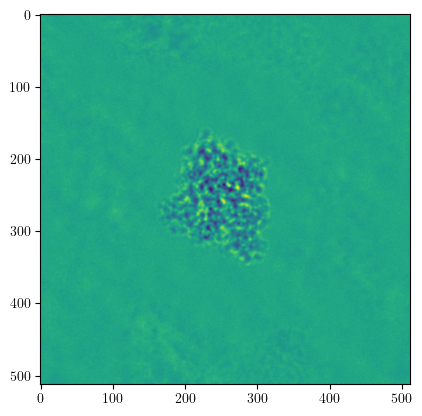

In [3]:
plt.imshow(image_stack[0])

grid_size =256*2
output_folder = f"/home/mg6942/mytigress/spike{grid_size}_ewald/"
# output_folder ='/home/mg6942/mytigress/spike256/../'
volume_folder_input =  f"/home/mg6942/mytigress/spike{grid_size}/"
outlier_file_input = "/home/mg6942/mytigress/simulated_empiar10180/volumes/vol0915.mrc"
dataset_dict = dataset.get_default_dataset_option()

# Fill these options with the path to preprocessed files
experiment_directory = '/home/mg6942/mytigress/uniform/'
dataset_dict['ctf_file'] = output_folder + "ctf.pkl"
dataset_dict['poses_file'] = output_folder + "poses.pkl"
dataset_dict['particles_file'] = f"{output_folder}particles.{grid_size}.mrcs"


# Returns an object that knows everything about the dataset.
cryo = dataset.load_dataset_from_dict(dataset_dict, lazy = False)
print("n images", cryo.n_images)
del dataset_dict['ind']

In [4]:
# cryo = dataset.load_cryodrgn_dataset( f"{output_folder}particles.{grid_size}.mrcs", output_folder + "poses.pkl", output_folder + "ctf.pkl", lazy = False)
from recovar import regularization, synthetic_dataset, noise, homogeneous, utils
sim_info = recovar.utils.pickle_load(output_folder + '/simulation_info.pkl')
gt_recon = synthetic_dataset.load_heterogeneous_reconstruction(sim_info, volumes_path_root = None)
gt_vol =gt_recon.get_mean()
noise_variance = sim_info['noise_variance']
signal_variance = utils.make_radial_image(regularization.average_over_shells(np.abs(gt_vol)**2, cryo.volume_shape), cryo.volume_shape)


In [ ]:
from recovar import ewald
reload(ewald)
x, res = ewald.solve_ewald_least_squares(cryo, 100, "nearest", signal_variance, noise_variance)

(INFO) (ewald.py) (30-Dec-23 15:30:33) batch size in second order: 100
(INFO) (ewald.py) (30-Dec-23 15:30:49) batch size in second order: 100
(INFO) (ewald.py) (30-Dec-23 15:30:54) batch size in second order: 100
(INFO) (ewald.py) (30-Dec-23 15:30:58) batch size in second order: 100
(INFO) (ewald.py) (30-Dec-23 15:31:02) batch size in second order: 100
(INFO) (ewald.py) (30-Dec-23 15:31:06) batch size in second order: 100
(INFO) (ewald.py) (30-Dec-23 15:31:10) batch size in second order: 100
(INFO) (ewald.py) (30-Dec-23 15:31:14) batch size in second order: 100
(INFO) (ewald.py) (30-Dec-23 15:31:17) batch size in second order: 100
(INFO) (ewald.py) (30-Dec-23 15:31:21) batch size in second order: 100
(INFO) (ewald.py) (30-Dec-23 15:31:25) batch size in second order: 100
(INFO) (ewald.py) (30-Dec-23 15:31:29) batch size in second order: 100
(INFO) (ewald.py) (30-Dec-23 15:31:32) batch size in second order: 100
(INFO) (ewald.py) (30-Dec-23 15:31:36) batch size in second order: 100
(INFO)

In [ ]:
plt.imshow(ctf1)
plt.figure()
plt.imshow(ctf2)

In [ ]:
phase_shift = np.arcsin(cryo_dataset.CTF_params[0,5]) / np.pi * 180




In [ ]:
from recovar import mask, simulator, covariance_core, ewald_core, ewald_functions
from recovar import simulate_scattering_potential as gsm
reload(simulator)

# CTF parameters from a real dataset
# Compute wavelength
wavelength = gsm.voltage_to_wavelength(300)#* 1e-0
# Change grid_size to test with different resolutions
grid_size = 32#512 *2*2
voxel_size = 0.81#2 * 128 / grid_size *2
image_shape = tuple(2*[grid_size])
volume_shape = tuple(3*[grid_size])

vol_spatial_mask = mask.get_radial_mask(tuple(3*[grid_size]))#, radius = grid_size-2)
vol_spatial = vol_spatial_mask# np.random.randn(*volume_shape)

# I am masking out big frequencies because things are not quite right there
vol = ftu.get_dft3(vol_spatial)
vol *= vol_spatial_mask 
volume_real = vol.real.reshape(-1)
volume_imag = vol.imag.reshape(-1)

from recovar import simulator

ctf_params, rotation_matrices, translations = simulator.random_sampling_scheme(1, grid_size, seed =0 )

# rotation_matrices[0] = np.identity(3)
# ctf_params[:,:2] *=0
# ctf_params[:,4] *=0
# ctf_params[:,6] = ctf_params[:,6] *0 + 1.2
ctf_params[:,5] = ctf_params[:,5] *0 ## W HAS NOT BEEN IMPLEMENTED SO THIS NEEDS TO BE SET TO 0 FOR NOW

lam = wavelength
x = ewald_functions.ewald_sphere_forward_model(volume_real, volume_imag, rotation_matrices, ctf_params, image_shape, volume_shape, voxel_size, lam, 'nearest_neighbor' )
chi= ewald_functions.compute_chi_wrapper(ctf_params, image_shape, voxel_size)
im = x[0][0] + 1j* x[1][0] 
im_spatial = ftu.get_idft2(im.reshape(image_shape))


In [ ]:
def compute_mat_vec_in_batches(experiment_dataset, volume_real, volume_imag, disc_type, signal_variance, noise_variance  ):
    
    residuals, summed_n =0, 0
    logger.info(f"batch size in second order: {batch_size}")
    data_generator = experiment_dataset.get_dataset_generator(batch_size=batch_size)

    for batch, indices in data_generator:
        # Only place where image mask is used ?
        batch = experiment_dataset.image_stack.process_images(batch, apply_image_mask = False)
        vol_real_this, vol_imag_this =compute_A_t_Av_ewald_sphere_forward_model(volume_real, volume_imag, rotation_matrices, ctf_params, image_shape, volume_shape, voxel_size, lam, disc_type)
        vol_real += vol_real
        vol_imag += vol_image_this

    return residuals / (summed_n + constants.ROOT_EPSILON)



In [ ]:
## ONE TEST THAT THE ADJOINT IS CORRECT

y_inp = np.concatenate([volume_real, volume_imag], axis=-1)
A_y_inp = ewald_functions.ewald_sphere_forward_model(volume_real, volume_imag, rotation_matrices, ctf_params, image_shape, volume_shape, voxel_size, lam, 'nearest_neighbor' )
A_y_inp_vec = np.concatenate(x, axis=-1)[0]

im_mask = mask.get_radial_mask(tuple(2*[grid_size])).reshape(-1)
test_x = [ np.random.randn(*x[0].shape) * im_mask, np.random.randn(*x[1].shape)* im_mask]
test_x_vec = np.concatenate(test_x, axis=-1)[0]

At_test_x = ewald_functions.adjoint_ewald_sphere_forward_model(test_x[0], test_x[1], rotation_matrices, ctf_params, image_shape, volume_shape, voxel_size, lam, 'nearest_neighbor' )
At_test_x_vec = np.concatenate(At_test_x, axis=-1)

# If adjoint is correct, then < x , Ay > === < A^T x, y >
print('rel error: ', np.abs(np.dot(test_x_vec, A_y_inp_vec) - np.dot(At_test_x_vec, y_inp)) / np.abs(np.dot(At_test_x_vec, y_inp)))

In [ ]:
# # Another test that ewald == plane whenever the wavelength is tiny 
# # y_inp = np.concatenate([volume_real, volume_imag], axis=-1)
# big_lam = lam * 1e-8
# A_y_inp = ewald_functions.ewald_sphere_forward_model(volume_real, volume_imag, rotation_matrices, ctf_params, image_shape, volume_shape, voxel_size, big_lam, 'nearest_neighbor' )
# A_y_2 = A_y_inp[0] + A_y_inp[1] * 1j

# # REMOVED THE FACTOR OF 2-- DOES THAT DO ANYTHING
# CTF_fun = core.evaluate_ctf_wrapper
# A_y_inp = covariance_core.get_projected_image(vol.reshape(-1), ctf_params, rotation_matrices, image_shape, volume_shape, grid_size, voxel_size, CTF_fun , 'nearest')

# ## FOR SOME REASON I FORGOT, THERE IS A FACTOR OF 2 THERE
# print('rel error: ', np.linalg.norm( A_y_2 - A_y_inp) / np.linalg.norm(A_y_2))


In [ ]:
import matplotlib.pyplot as plt
im1 = ftu.get_idft2(A_y_2.reshape(image_shape))
plt.imshow(im1.real);  plt.colorbar()
im2 = ftu.get_idft2((A_y_inp).reshape(image_shape))
plt.figure()
plt.imshow(im2.real);  plt.colorbar()
im3 = ftu.get_idft2((A_y_inp -  A_y_2).reshape(image_shape))
plt.figure()
plt.imshow(im3.real); plt.colorbar()

In [ ]:
import matplotlib.pyplot as plt
im1 = np.abs(A_y_2.reshape(image_shape))
plt.imshow(im1.real);  plt.colorbar()
im2 = np.abs((A_y_inp).reshape(image_shape))
plt.figure()
plt.imshow(im2.real);  plt.colorbar()
im3 = np.abs((A_y_inp -  A_y_2).reshape(image_shape))
plt.figure()
plt.imshow(im3.real); plt.colorbar()

In [ ]:
# SOME OTHER TESTS I USED TO DEBUG..

In [ ]:

disc_type = 'nearest'
vol_real_on_sphere = get_ewald_sphere_slices(volume_real, rotation_matrices, image_shape, volume_shape, volume_shape[0], voxel_size, wavelength*1e0,  disc_type)
vol_plane = core.get_slices(volume_real, rotation_matrices, image_shape, volume_shape, grid_size, disc_type)

import matplotlib.pyplot as plt
plt.imshow((vol_real_on_sphere - vol_plane)[0].reshape(image_shape))
plt.colorbar()

In [ ]:
sphere_coords = get_unrotated_ewald_sphere_coords(image_shape, voxel_size, lam, scaled = False)
plane_coords = core.get_unrotated_plane_grid_points(image_shape)
print(np.linalg.norm(sphere_coords - plane_coords))

In [ ]:
from recovar import covariance_core
CTF_fun = core.compute_ctf_cryodgrn_wrapper
x2 = covariance_core.get_projected_image(vol.reshape(-1), ctf_params, rotation_matrices, image_shape, volume_shape, grid_size, voxel_size, CTF_fun , 'nearest')
x3 = ftu.get_idft2(x2[0].reshape(image_shape))

In [ ]:
plt.imshow(x3.real)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(im_spatial.real)
plt.figure()
plt.imshow(chi[0].reshape(image_shape))
plt.colorbar()

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(vol_spatial.reshape(volume_shape).sum(axis=0))

In [ ]:
plt.imshow(x[0][0].reshape(image_shape).real)

In [ ]:
import esc_test_functions as esc_tf

In [ ]:


def make_image(volume, rotation_matrix, image_shape, volume_shape, grid_size, disc_type, voxel_size, wavelength, freq_grid_sphere, CTF_params):
    clean_image = esc_tf.get_ewald_slices(volume, rotation_matrix, image_shape, volume_shape, grid_size, disc_type, voxel_size, wavelength)
    clean_image_split = np.concatenate((clean_image.real, clean_image.imag))
    chi = get_chi(freq_grid_sphere, CTF_params[0, 0], CTF_params[0, 1], CTF_params[0, 2],CTF_params[0, 3],CTF_params[0, 4],CTF_params[0, 5],CTF_params[0, 6],CTF_params[0, 7])
    img_real = esc_tf.apply_A_r(image_shape, clean_image_split, chi)
    img_imag = esc_tf.apply_A_i(image_shape, clean_image_split, chi)
    return img_real, img_imag

In [ ]:
# Marc's model

img_real, img_imag = ewald_sphere_forward_model(volume_real, volume_imag, rotation_matrices, ctf_params, image_shape, volume_shape, voxel_size, lam, disc_type)
img_real = img_real.reshape(image_shape)
img_imag = img_imag.reshape(image_shape)

plt.imshow(img_real)
plt.colorbar()
plt.figure()
plt.imshow(img_imag)
plt.colorbar()
plt.figure()

# My model 

freqs = get_unrotated_ewald_sphere_coords(image_shape, voxel_size, lam, scaled=True)

img_real2, img_imag2 = make_image(vol, rotation_matrices, image_shape, volume_shape, grid_size, disc_type, voxel_size, wavelength, freqs, ctf_params)
img_real2 = img_real2.reshape(image_shape)
img_imag2 = img_imag2.reshape(image_shape)  

plt.imshow(img_real2)
plt.colorbar()
plt.figure()
plt.imshow(img_imag2)
plt.colorbar()


In [ ]:
print(np.linalg.norm(img_real2 - img_real)/np.linalg.norm(img_real2))
print(np.linalg.norm(img_imag2 - img_imag)/np.linalg.norm(img_imag2))